In [2]:
# required Libraries are imported
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [3]:

# Task 1 - Define the number of locations and vehicles
num_locations = 30  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 200), random.randint(0, 200)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Defined the central depot location as a fixed point
num_vehicles = 3  # total number of vehicles available

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Defined the fitness function to minimize. The two objectives are total distance and balance penalty and both has to be minimized.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.


In [5]:

# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [6]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Used standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.06)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


In [9]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	1785.37	5.36686
1  	232   	1723.28	12.7543
2  	227   	1674.23	10.0119
3  	245   	1672.56	11.9712
4  	222   	1650.79	3.43642
5  	234   	1655.53	10.6289
6  	212   	1623.24	9.41052
7  	244   	1612.79	4.47741
8  	230   	1615.52	0.810549
9  	224   	1594.63	12.4341 
10 	209   	1574.32	12.563  
11 	227   	1574.3 	6.32518 
12 	221   	1560.88	10.1972 
13 	230   	1566.5 	5.38318 
14 	226   	1531.04	7.34006 
15 	221   	1527.42	1.8892  
16 	231   	1513.89	10.9278 
17 	218   	1498.3 	7.86702 
18 	242   	1486.84	4.38959 
19 	218   	1403.3 	4.38959 
20 	249   	1346.64	4.56084 
21 	217   	1289.28	2.20431 
22 	209   	1270.87	5.98963 
23 	217   	1253.93	4.01797 
24 	221   	1231.56	8.70135 
25 	225   	1199.67	4.097   
26 	239   	1185.16	8.75814 
27 	237   	1159.86	6.18715 
28 	234   	1150.91	4.4656  
29 	228   	1131.65	4.4656  
30 	225   	1127.29	5.415   
31 	235   	1124.49	5.415   
32 	232   	1114.39	4.8445  
33 	221   	1097.69	4.13616 
34 	227   	1092.08	7.42984 
3

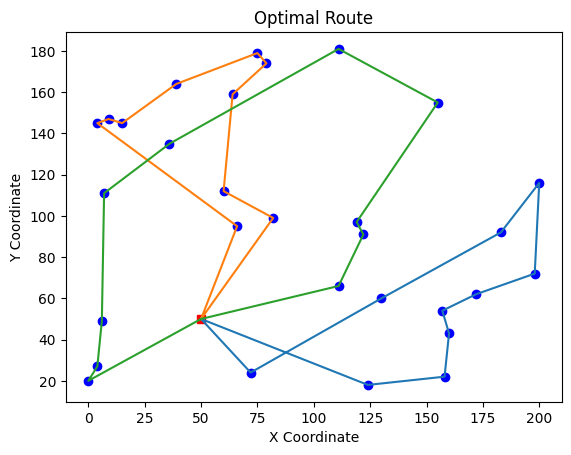

In [10]:
# Running the Genetic Algorithm
def main():
    random.seed(32)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()